In [1]:
# ===================================================================
#                          METADATA
# ===================================================================

# -------------------- General Information --------------------------
# 1. Title: Figure Script
# 2. Description: Script to reproduce Figure SI 3 in the article
# "Ionic Liquid--Electrode Interface: from One Law To Fit Them All to One Model To Predict Them All".
# 3. Authors:
#    - Ba Long Nguyen (ORCID: 0009-0003-7682-9851)
#    - Vladislav Ivanistsev (ORCID: 0000-0003-4517-0540)
# 4. Contact: balongn99@gmail.com & vladislav.ivanistsev@gmail.com
# 5. Keywords: differential capacitance, ionic liquids, modelling, fitting.

# -------------------- Identifiers & Versioning ---------------------
# 6. Version: 1.0.0
# 7. Date: 
#    - Created: 2025-06-13
#    - Last Modified: 2025-09-24
# 8. DOI: https://doi.org/10.1016/j.elecom.2025.108049

# -------------------- Usage & Accessibility ------------------------
# 10. License: This work is licensed under the MIT License.
# 11. Dependencies:
#     - Python 3.8+
#     - See 'requirements.txt' for necessary libraries (e.g., numpy, pandas, scipy, matplotlib).
# 13. Data Format:
#     - Units: Potential (V), Capacitance (μF/cm²), Surface Charge Density (μC/cm²)

In [2]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, least_squares

l = 8.25/2.54 # inches
plt.rc('figure',figsize=(l,l)) # figure size
plt.rc('figure',      dpi=500) # figure dpi
plt.rc('lines',  linewidth=1)  # linewidth
plt.rc('font',        size=10) # fontsize of the text
plt.rc('font', family='sans-serif') # font family
plt.rc('axes',   titlesize=10) # fontsize of the axes title
plt.rc('axes',   labelsize=9)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=8)  # fontsize of the tick labels
plt.rc('ytick',  labelsize=8)  # fontsize of the tick labels
plt.rc('legend', fontsize =9)  # fontsize of the legend
plt.rc('figure', titlesize=10) # fontsize of the figure title

In [3]:
# ──────────────────── DATASETS ────────────────────
data_TFSAN1444 = {
  "U": np.array([
    -8.3471953, -7.3284585, -6.3323917, -5.3935963, -4.4607511, -3.6253825,
    -2.8072444, -1.9518697, -1.492276, -1.2818577, -0.9988757, -0.7828346,
    -0.56227069, -0.34848205, -0.17995929, -0.019204594, 0.095999847,
    0.34901804, 0.49749229, 0.711711, 0.86740834, 1.0766674, 1.1570238,
    1.3724832, 1.8167261, 2.247584, 2.7208152, 3.2875645, 3.762309,
    4.5039261, 5.148517
]),
  "C": np.array([
    2.835326, 2.9506751, 3.102149, 3.2514403, 3.4598331, 3.5954313, 3.5663506,
    3.9684596, 4.5572039, 5.3499249, 6.4213386, 6.5765571, 7.3102311, 7.9327507,
    9.2040244, 9.0655433, 8.79109, 8.1296419, 7.9496588, 8.2993821, 8.9952376,
    9.4020184, 8.7264091, 8.2272501, 6.8495962, 6.492727, 6.1845399, 5.4065466,
    4.9598812, 4.3912146, 3.9403927
]),
  "dC": np.array([
    0.027831316, 0.02029681, 0.027033727, 0.022701913, 0.031191883,
    0.023856931, 0.02526229, 0.28119206, 0.24014217, 0.3369417,
    0.20175832, 0.13690707, 0.12681763, 0.084417118, 0.11252085,
    0.64400311, 0.61826413, 0.5300547, 0.35538246, 0.28988308,
    0.49747286, 0.77335413, 0.70254107, 0.69207398, 0.055009441,
    0.072124614, 0.068609406, 0.1464859, 0.13430493, 0.11148882,
    0.24150723
])
}
data_TFSAN4444 = {
  "U": np.array([
    -6.9235032, -6.2943019, -5.6690349, -5.205766, -4.7180861, -4.2263572,
    -3.6921715, -3.2306907, -2.2112135, -1.8513477, -1.3382141, -0.91914043,
    -0.59790339, -0.48655425, -0.31282697, -0.13775049, 0.010520416,
    0.16427647, 0.34679497, 0.4941258, 0.68505385, 0.85330632, 0.93937834,
    1.1627972, 1.3694297, 1.7664467, 1.9672773, 2.304863, 2.5641512,
    2.8378304, 3.0135231, 3.3695203, 3.4283856
]),
  "C": np.array([
    2.6156619, 2.6266988, 2.7545252, 2.9779115, 3.0706948, 3.0442033,
    3.0222109, 3.0683997, 3.2665325, 3.3490758, 3.6424097, 4.3655909,
    6.0998612, 8.1976905, 9.6753046, 9.3218903, 9.3433827, 9.4674357,
    9.022579, 8.825957, 9.8087744, 9.5171614, 9.0262009, 8.4043191,
    7.3044666, 6.4439276, 5.8928442, 5.5292469, 5.7697162, 5.874368,
    6.7022525, 6.2945907, 5.7324958
]),
  "dC": np.array([
    0.064096479, 0.08174371, 0.047193305, 0.075968008, 0.01259677, 0.041627843,
    0.040374335, 0.089611885, 0.11804651, 0.12043831, 0.16563, 0.10928704,
    0.37561511, 0.77152823, 0.39347281, 0.09417825, 0.22686795, 0.21905967,
    0.21261624, 0.20448682, 0.56499967, 0.81030749, 0.59189395, 0.59527661,
    0.062871094, 0.33506675, 0.24606094, 0.24093311, 0.1242673, 0.35777088,
    0.73013686, 0.84170294, 2.0941119
])
}

# s_M for negative branches:
sM_vals = {
    "$\\mathrm{N_{1444}}^+$": -30.8,   # N1444
    "$\\mathrm{N_{4444}}^+$": -22.5    # N4444
}

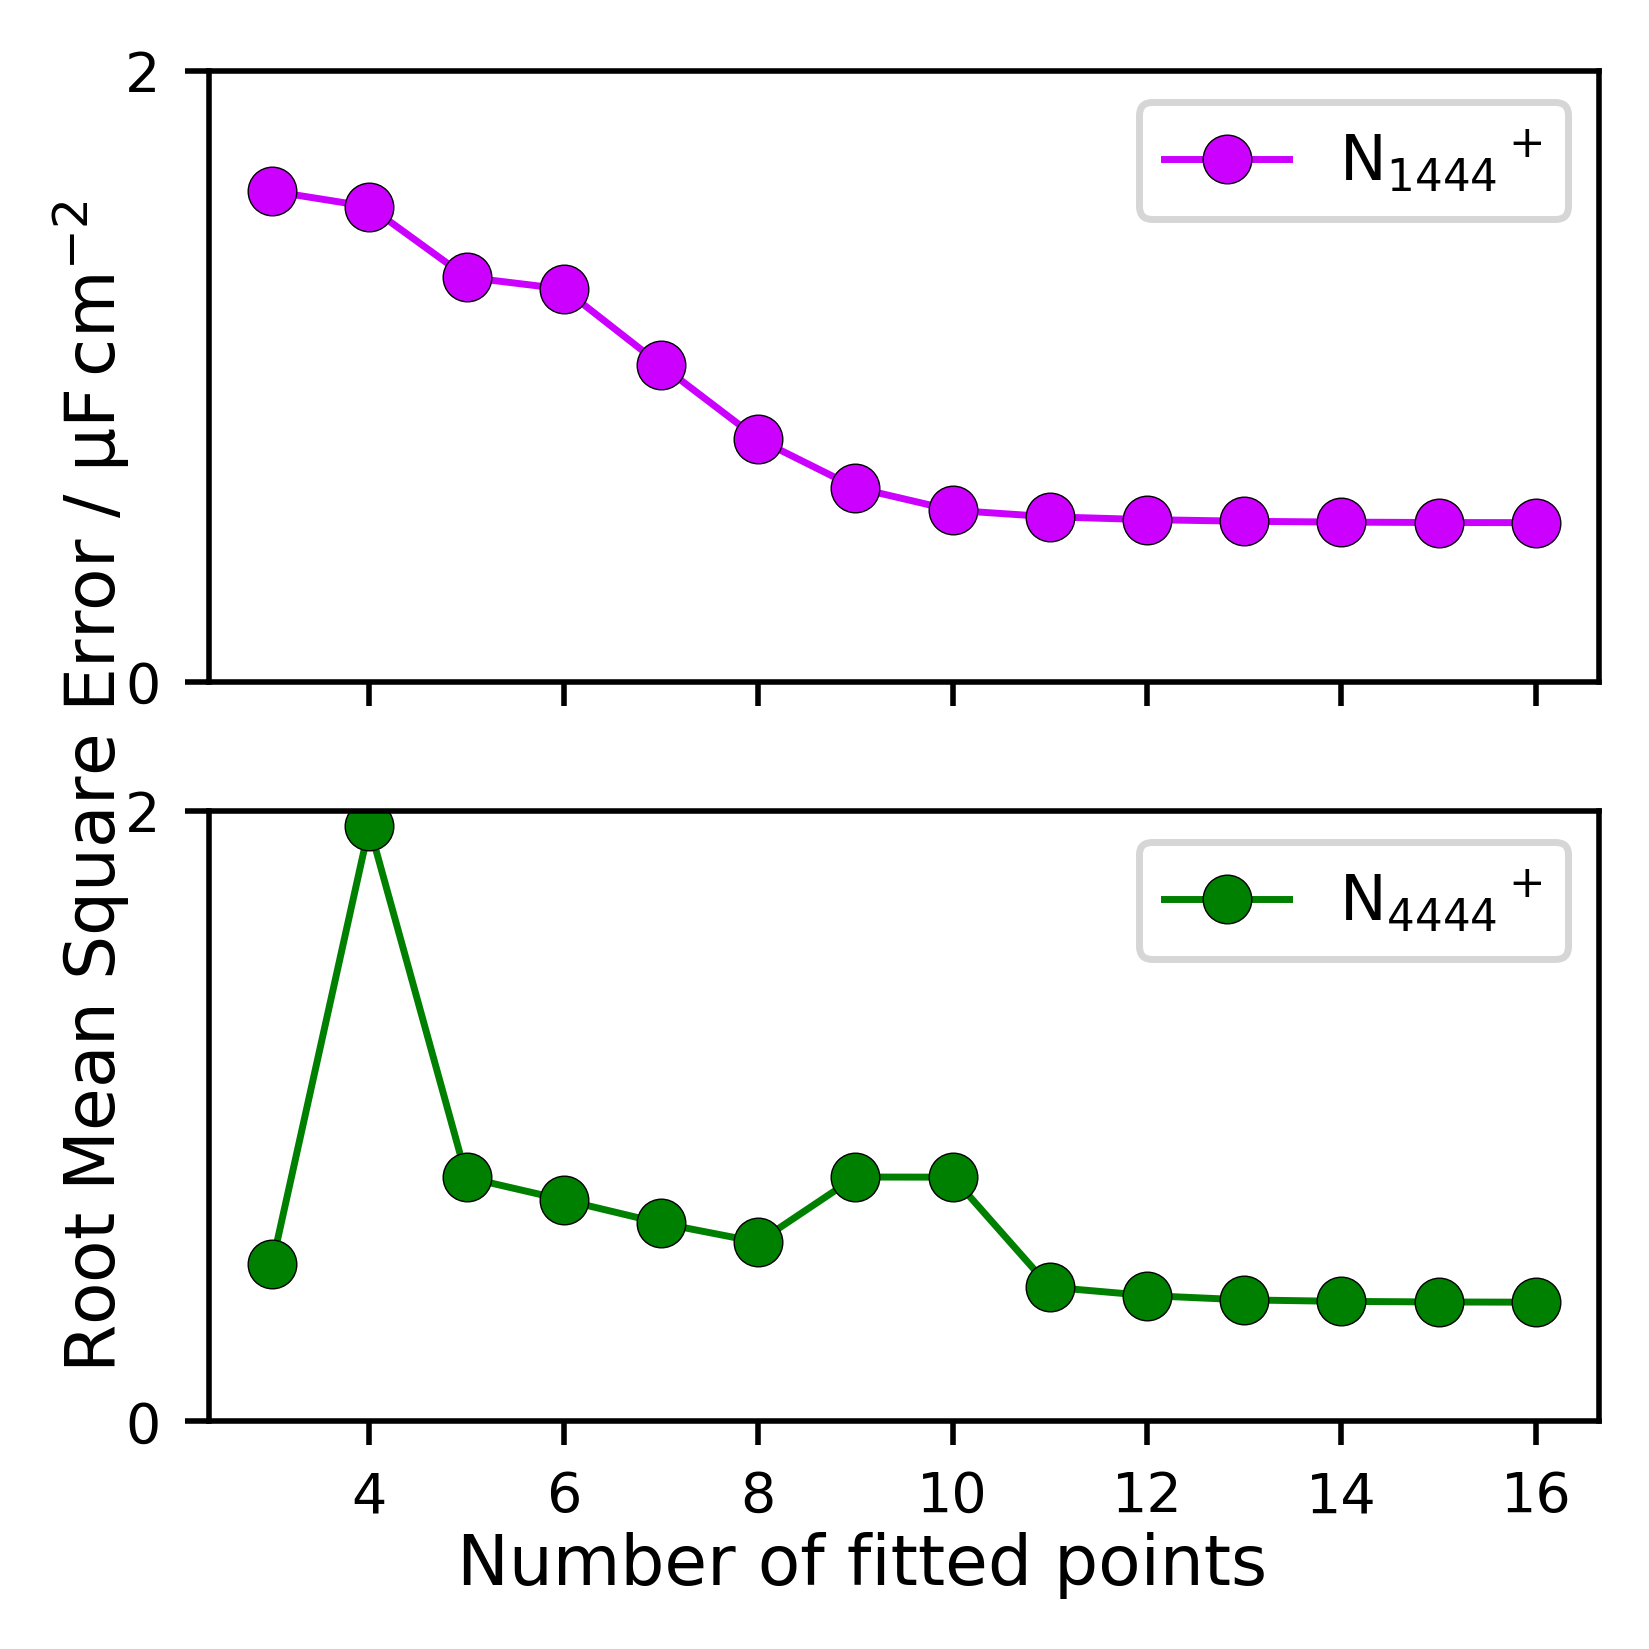

In [4]:
colors = ['#cc00ffff', 'green']
# capacitance & residuals
def capacitance(u, sM, uM, k1, k2):
    a  = k1 + (1 - k1) * np.exp(-k2 * u / uM)
    ap = (1 - k1) * (-k2 / uM) * np.exp(-k2 * u / uM)
    return sM * (u / uM)**a * (a / u + ap * np.log(u / uM))

def make_residuals(sM):
    def res(p, U_sub, C_sub):
        uM, k1, k2 = p
        # enforce negative‐branch uM<0
        if uM >= 0:
            return np.full_like(C_sub, 1e6)
        return capacitance(U_sub, sM, uM, k1, k2) - C_sub
    return res

def compute_rmse_curve(U, C, sM):
    """Return (subset sizes, rmse) for the negative branch."""
    # sort by |U|, pick U<0
    mask = U < 0
    Un, Cn = U[mask], C[mask]
    order = np.argsort(np.abs(Un))
    Un, Cn = Un[order], Cn[order]

    res_fun = make_residuals(sM)
    sizes, rmses = [], []
    for n in range(3, len(Un)+1):
        idx = order[:n]
        U_sub, C_sub = Un[:n], Cn[:n]

        # DE + refine
        lb, ub = [-15, 0, 0], [-1e-2, 1, 1000]
        de = differential_evolution(lambda p: np.sum(res_fun(p, U_sub, C_sub)**2),
                                    bounds=list(zip(lb, ub)), maxiter=500, seed=0)
        ls = least_squares(res_fun, x0=de.x, args=(U_sub, C_sub), bounds=(lb, ub))

        # full‐branch RMSE
        Cp = capacitance(Un, sM, *ls.x)
        rmse = np.sqrt(np.mean((Cp - Cn)**2))
        sizes.append(n)
        rmses.append(rmse)

    # filter extreme outliers
    arr = np.array(rmses)
    keep = arr <= 10 * arr.min()
    return np.array(sizes)[keep], np.array(rmses)[keep]

# --- plot ---
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

for ax, (label, data), col in zip(
        axs,
        [("$\\mathrm{N_{1444}}^+$", data_TFSAN1444), ("$\\mathrm{N_{4444}}^+$", data_TFSAN4444)],
        colors
    ):
    U, C = data["U"], data["C"]
    sz, rm = compute_rmse_curve(U, C, sM_vals[label])

    ax.plot(
        sz,
        rm,
        'o-',         
        color=col,   
        label=f"{label}",
        markeredgecolor='black', markeredgewidth=0.2, markersize=7
    )
    ax.set_ylim(0, 1.7)
    ax.set_yticks([0, 2])
    ax.legend()



# shared X label
fig.text(0.5,   
         0,    
         "Number of fitted points",
         ha='center',
         va='bottom',
         )

# shared Y label
fig.text(0,   
         0.5, 
         "Root Mean Square Error / $\\mathrm{\\mu F\\,cm^{-2}}$",
         ha='left',
         va='center',
         rotation='vertical',
         )

plt.tight_layout()
# plt.savefig("Figure_SI3_RMSE2.pdf", dpi=600, bbox_inches='tight')
plt.show()
